In [21]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

In [22]:
query = "Select * from Customers limit 4;"
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [23]:
query = "Select * from salesdata limit 3;"
read_query(query)


,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [58]:
query = """Select s.CustomerID,c.firstname,s.SaleDate,s.TotalPrice 
from salesdata s
join customers c
on c.CustomerID = s.CustomerID
order by s.CustomerID
limit 5;"""


read_query(query)

,CustomerID,firstname,SaleDate,TotalPrice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [30]:
query = """Select CustomerID,
sum(TotalPrice) as Expenditure 
from salesdata
group by CustomerID;"""


read_query(query)

,CustomerID,Expenditure
0,C-2023-100-1,9933032.00
1,C-2023-100-10,9779316.00
2,C-2023-100-100,9889393.00
3,C-2023-100-101,9168084.00
4,C-2023-100-102,10315608.00
...,...,...
195,C-2023-100-95,8826287.00
196,C-2023-100-96,9996920.00
197,C-2023-100-97,10432046.00
198,C-2023-100-98,8863324.00


In [38]:
query = """Select t.CustomerID , c.firstname , t.Expenditure
from
(Select CustomerID,
sum(TotalPrice) as Expenditure 
from salesdata
group by CustomerID) t
join Customers c
on t.CustomerID =c.CustomerID
order by Expenditure desc
limit 10;"""


top_annual_customers = read_query(query)

In [42]:
Customers_names = top_annual_customers['firstname'].values

In [43]:
Customers_names

array(['Veer', 'Priyansh', 'Riya', 'Vanya', 'Dhruv', 'Tarini', 'Yuvraj ',
       'Rhea', 'Darshit', 'Prerak'], dtype=object)

In [46]:
top_annual_customers['Expenditure'].values

array([Decimal('13016064.00'), Decimal('12629337.00'),
       Decimal('12599608.00'), Decimal('12455437.00'),
       Decimal('12280916.00'), Decimal('12130487.00'),
       Decimal('11868602.00'), Decimal('11704275.00'),
       Decimal('11520699.00'), Decimal('11442527.00')], dtype=object)

In [50]:
## Change decimal to float
top_annual_customers['Expenditure']=top_annual_customers['Expenditure'].astype(float)

In [54]:
Customer_exp = top_annual_customers['Expenditure'].values

In [55]:
Customer_exp

array([13016064., 12629337., 12599608., 12455437., 12280916., 12130487.,
       11868602., 11704275., 11520699., 11442527.])

<BarContainer object of 10 artists>

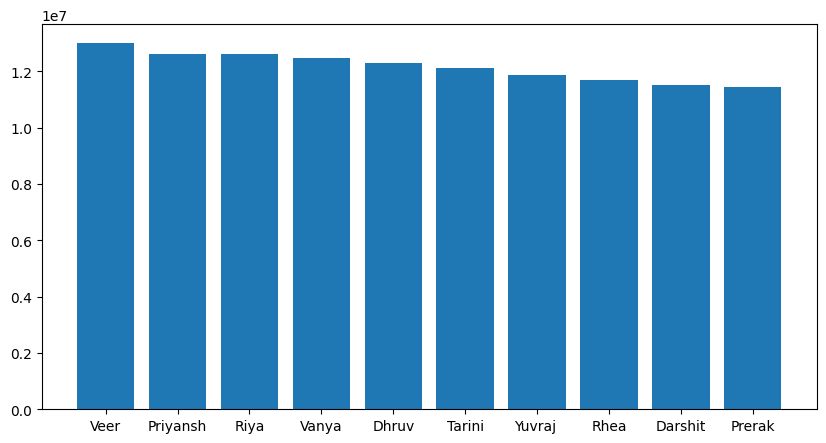

In [60]:
plt.figure(figsize=(10,5))
plt.bar(height= Customer_exp, x=Customers_names)